In [2]:
import pandas as pd

fish_df = pd.read_csv('fish_filtered.csv')
fish_df.head()

,Unnamed: 0,Longitude,Latitude,Acantholiparis_opercularis,Acromycter_atlanticus,Acromycter_perturbator,Acropoma_lecorneti,Adelosebastes_latens,Akarotaxis_nudiceps,Albatrossia_pectoralis,...,Zebrasoma_rostratum,Zebrasoma_scopas,Zebrasoma_xanthurum,Zebrias_zebra,Zenarchopterus_buffonis,Zenarchopterus_gilli,Zoramia_fragilis,Zoramia_gilberti,Zoramia_leptacantha,Zoramia_perlita
0,9294,139,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9295,140,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9296,141,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9297,142,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9298,144,47,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import networkx as nx

In [10]:
G = nx.Graph()

In [5]:
# Get the list of species columns (all columns except the first, Longitude, and Latitude)
species_cols = fish_df.columns.difference(['Unnamed: 0', 'Longitude', 'Latitude'])


In [6]:
{
    'max_latitude': fish_df['Latitude'].max(),
    'min_latitude': fish_df['Latitude'].min(),
    'max_longitude': fish_df['Longitude'].max(),
    'min_longitude': fish_df['Longitude'].min(),
}

{'max_latitude': 47,
 'min_latitude': 18,
 'max_longitude': 180,
 'min_longitude': 132}

In [7]:
num_rows = fish_df.shape[0]
num_rows

1408

In [11]:

num_rows = fish_df.shape[0]  # Uncomment this line to process all rows

for i in range(num_rows):
    current_row = fish_df.iloc[i]
    current_species = current_row[species_cols]
    # log every 20 rows processed
    if i % 20 == 0:
        print(f"Processing row {i} of {num_rows}")
    if current_species.sum() == 0:
        continue  # skip rows with all zeroes in species columns
    # Iterate through the remaining rows to find connections
    # with shared species
    # This avoids checking pairs that have already been checked (the graph is undirected)
    for j in range(i + 1, num_rows):
        # Get the candidate row
        candidate_row = fish_df.iloc[j]
        candidate_species = candidate_row[species_cols]
        if candidate_species.sum() == 0:
            continue

        intersection = current_species & candidate_species
        intersection_sum = intersection.sum()
        # Find columns where both rows have a 1 (i.e., both have the species)
        if intersection_sum > 0:
            # node name is concatenation of the longitude and latitude
            node_name = f"{current_row['Longitude']}_{current_row['Latitude']}"
            # second node name is constructed similarly
            candidate_node_name = f"{candidate_row['Longitude']}_{candidate_row['Latitude']}"
            # Add an edge between the two nodes
            G.add_edge(node_name, candidate_node_name, weight=intersection_sum)
    if i % 20 == 0:
        print(f"graph size: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


Processing row 0 of 1408
graph size: 602 nodes, 601 edges
Processing row 20 of 1408
graph size: 1177 nodes, 23681 edges
Processing row 40 of 1408
graph size: 1288 nodes, 46397 edges
Processing row 60 of 1408
graph size: 1289 nodes, 68681 edges
Processing row 80 of 1408
graph size: 1289 nodes, 90705 edges
Processing row 100 of 1408
graph size: 1365 nodes, 113855 edges
Processing row 120 of 1408
graph size: 1365 nodes, 135099 edges
Processing row 140 of 1408
graph size: 1368 nodes, 157380 edges
Processing row 160 of 1408
graph size: 1368 nodes, 177831 edges
Processing row 180 of 1408
graph size: 1369 nodes, 199670 edges
Processing row 200 of 1408
graph size: 1369 nodes, 219456 edges
Processing row 220 of 1408
graph size: 1371 nodes, 240823 edges
Processing row 240 of 1408
graph size: 1371 nodes, 260477 edges
Processing row 260 of 1408
graph size: 1371 nodes, 279504 edges
Processing row 280 of 1408
graph size: 1381 nodes, 300725 edges
Processing row 300 of 1408
graph size: 1381 nodes, 318

In [12]:
# Save the graph
nx.write_pajek(G, 'fish_network.net')

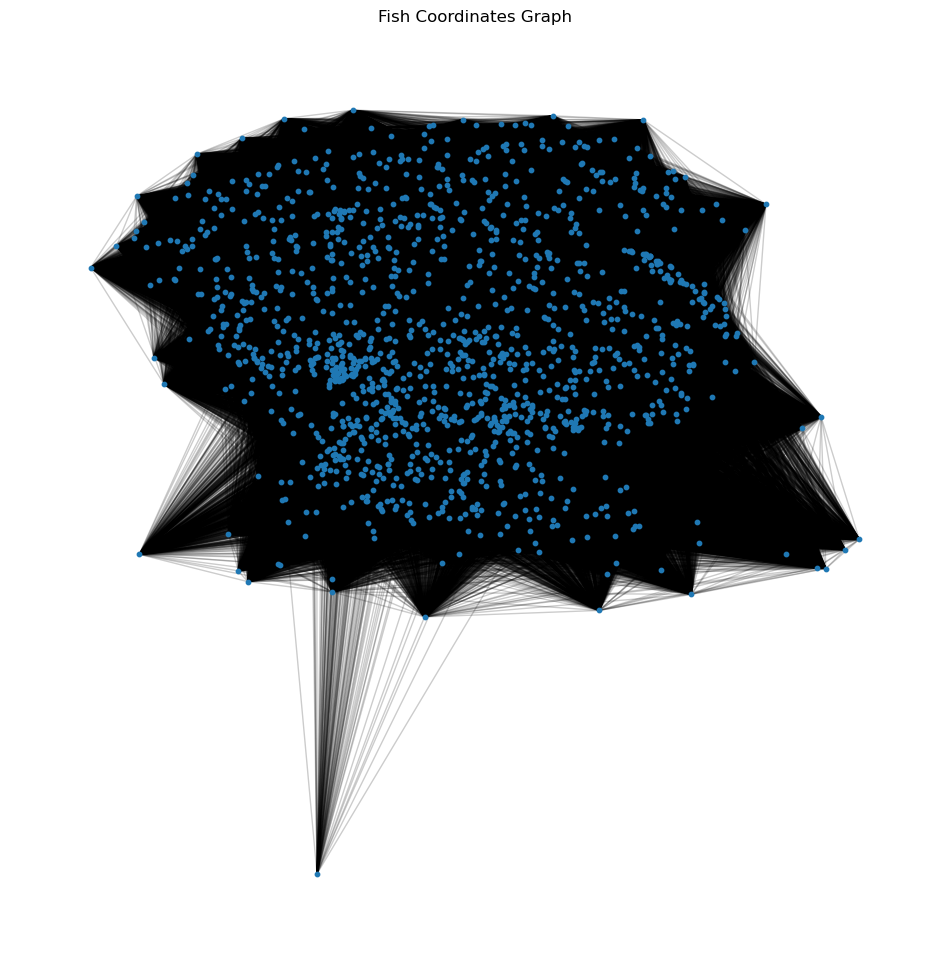

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Fish Coordinates Graph")
plt.axis('off')
plt.show()

In [14]:
# get top 10 nodes by degree
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
top_nodes

[('141_29', 1396),
 ('142_29', 1396),
 ('140_28', 1396),
 ('141_28', 1396),
 ('142_28', 1396),
 ('145_28', 1396),
 ('166_28', 1396),
 ('168_28', 1396),
 ('135_27', 1396),
 ('140_27', 1396)]

In [15]:
# get bottom 10 nodes by degree
bottom_nodes = sorted(G.degree, key=lambda x: x[1])[:10]
bottom_nodes

[('178_18', 98),
 ('139_47', 601),
 ('178_19', 650),
 ('179_21', 659),
 ('176_18', 692),
 ('179_20', 706),
 ('173_25', 708),
 ('177_25', 708),
 ('178_25', 708),
 ('179_25', 708)]

In [16]:
# top 10 edges by weight
top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
top_edges

[('132_33', '134_33', {'weight': 527}),
 ('135_34', '132_33', {'weight': 521}),
 ('135_34', '134_33', {'weight': 505}),
 ('137_34', '134_33', {'weight': 503}),
 ('132_33', '132_32', {'weight': 500}),
 ('140_35', '139_34', {'weight': 499}),
 ('141_36', '140_35', {'weight': 497}),
 ('134_33', '132_32', {'weight': 479}),
 ('137_34', '132_33', {'weight': 473}),
 ('134_33', '135_33', {'weight': 472})]

In [17]:
node_names = list(G.nodes)
# sort the node names
node_names.sort()
# print the first 10 node names
print("First 10 node names:")
print(node_names[:10])
# print the last 10 node names
print("Last 10 node names:")
print(node_names[-10:])

First 10 node names:
['132_18', '132_19', '132_20', '132_21', '132_22', '132_23', '132_24', '132_25', '132_26', '132_27']
Last 10 node names:
['180_38', '180_39', '180_40', '180_41', '180_42', '180_43', '180_44', '180_45', '180_46', '180_47']


In [18]:
node_pairs = [tuple(map(int, name.split('_'))) for name in node_names]
node_pairs[:10]  # show the first 10 pairs as a sample

[(132, 18),
 (132, 19),
 (132, 20),
 (132, 21),
 (132, 22),
 (132, 23),
 (132, 24),
 (132, 25),
 (132, 26),
 (132, 27)]

In [19]:
first_elements = [pair[0] for pair in node_pairs]
min_first = min(first_elements)
max_first = max(first_elements)
print(f"Minimum value: {min_first}, Maximum value: {max_first}")

Minimum value: 132, Maximum value: 180


In [20]:
second_elements = [pair[1] for pair in node_pairs]
min_second = min(second_elements)
max_second = max(second_elements)
print(f"Minimum value: {min_second}, Maximum value: {max_second}")

Minimum value: 18, Maximum value: 47
